<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신 러닝 종류 - 사람의 감독 하에 훈련하는 것인지 아닌지 분류
* 지도 학습(Supervised Learning) : 레이블(타겟)이 있는 데이터를 학습.
    * 분류(classification) : 클래스들을 분류.
    * 회귀(regression) : 숫자 예측
* 비지도 학습(Unsupervised Learning) : 레이블(타겟)이 없는 데이터를 학습.
    * 군집(clustering)
    * 시각화(visualization)
    * 이상치(outlier) 탐지
* 준지도 학습(semi-supervised learning) : 비지도 학습 + 전문가 시스템
    * 소량의 라벨이 있는 데이터와 대량의 라벨이 없는 데이터를 함께 활용해서 학습하는 방법
    * 사진 이미지 데이터를 학습할 때(선글라스 착용) 추후 선글라스 부분의 이미지를 예측하는 것.
    * 배웠던 부분은 전문가의 수준.
    * 라벨이 적은 상황에서도 높은 정확도를 내어 성능 향상에 도움이 됨.
    * 이미지 분류, 음성 인식(유튜브 자막 자동 생성), 자연어 처리(뉴스 분류, 감성 분석)에 활용 가능
* 강화 학습(reinforcement learning) : 보상과 벌칙을 통해서 학습.

# 문제

fish 데이터셋에서 물고기의 무게를 예측.
* Perch(농어)의 무게(Weight)를 길이(Length) 특성만으로 예측.
    * Weight(관심 변수, 레이블 ,타겟) ~ Length(독립 변수, 특성)
    * KNN, Linear Regression
* Perch의 무게를 다른 4개의 특성들로 예측.
    * Weight ~ Length + Diagonal + Height + Width
    * Linear Regression

# Imports

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor   # KNN을 이용한 숫자 예측 알고리즘.
from sklearn.linear_model import LinearRegression   # 선형 회귀를 이용한 숫자 예측 알고리즘.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # 회귀 평가 지표들.
from sklearn.preprocessing import PolynomialFeatures    # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline   # 변환기와 추정기를 연결해서 추정기 역할을 하는 클래스.

# 데이터 준비

In [226]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [227]:
fish = pd.read_csv(file_path)

In [228]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [229]:
perch = fish[fish.Species == 'Perch']

In [230]:
pd.options.display.max_rows = 10

In [231]:
perch   # 총 56 rows

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415
...,...,...,...,...,...,...
123,Perch,1100.0,42.0,44.6,12.8002,6.8684
124,Perch,1000.0,43.0,45.2,11.9328,7.2772
125,Perch,1100.0,43.0,45.5,12.5125,7.4165
126,Perch,1000.0,43.5,46.0,12.6040,8.1420


농어의 무게(Weight)를 길이(Length)만으로 예측할 수 있을까?
* 특성(feature) : Length -> 2차원 배열
* 레이블(label), 타겟(target) : Weight -> 1차원 배열

In [232]:
# 특성 배열 - (samples, features) shape의 2차원 배열
X = perch[['Length']].values

In [233]:
X[:5]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [234]:
X.shape   #> 샘플 개수 : 56, 특성 개수 : 1개, 2차원 배열

(56, 1)

In [235]:
# 타겟 배열 - (samples, )   shape의 1차원 배열
y = perch['Weight'].values.copy()   # 원본을 변경하지 않은 상태로 남기려고.

In [236]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

In [237]:
y.shape  # 1차원 배열

(56,)

# train-test split

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [239]:
56 * 0.25

14.0

In [240]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 1), (14, 1), (42,), (14,))

In [241]:
# y(Weight) ~ X(Length) 산점도 시각화. 훈련 셋/ 테스트 셋 구분.

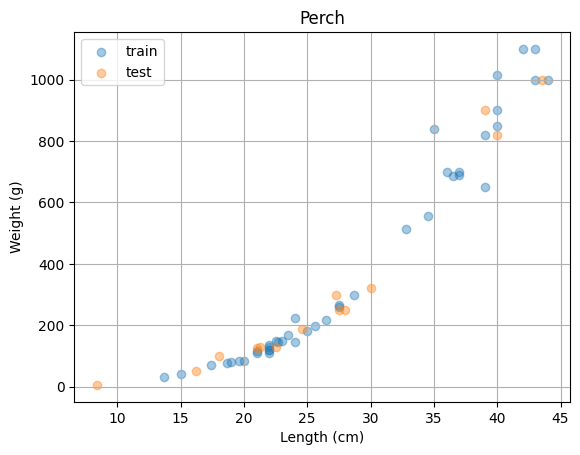

In [242]:
plt.scatter(x=X_train, y=y_train, label='train', alpha=0.4)
plt.scatter(x=X_test, y=y_test, label='test', alpha=0.4)

plt.title('Perch')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.legend()
plt.show()

# KNN 모델 훈련, 평가

KNN(K-Nearest Neighbors) Regressor : 가장 가까운 k개의 이웃들의 레이블(타겟) 평균 값으로 숫자를 예측하는 모델.

In [243]:
knn = KNeighborsRegressor()     # 모델 생성

In [244]:
knn.fit(X_train, y_train)       # 모델 훈련

KNeighborsRegressor()

In [245]:
train_pred = knn.predict(X_train)   # 훈련 셋의 예측값  - 예측한 무게

In [246]:
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [247]:
y_train # 실제값 - 실제 무게

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [248]:
test_pred = knn.predict(X_test) # 테스트 셋의 예측값

In [249]:
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [250]:
y_test  # 테스트 셋의 실제값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

# 회귀 모델의 평가 지표(metrics)

* MSE(Mean Squared Errors) : 오차들의 제곱의 평균.
* RMSE(Root Mean Squared Errors) : MSE의 제곱근.
* MAE(Mean Absolute Errors) : 오차들의 절대값의 평균.
* MSE, RMSE, MAE는 값이 작을 수록 좋은 점수. 값이 클 수록 나쁜 점수!
    * 일반적인 평가지표들은 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수.
    * 회귀 문제에서도 오차들이 작을 수록 점수가 커지는 평가지표를 개발 -> R2 score.

* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}}
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [251]:
# 훈련 셋의 MSE
mean_squared_error(y_train, train_pred)     # 실제값(정답), 예측값(모델의)

3716.5161904761903

In [252]:
# 훈련 셋의 RMSE
np.sqrt(mean_squared_error(y_train, train_pred))    # 60 정도의 평균적인 오차 발생
"""
원래의 데이터 단위와 일치한다는 장점, 직관적으로 해석하기 용이함, 미분의 가능성을 유지함, 큰 오차에 더 큰 페널티를 부여하는 특성 존재함.
MSE와 동일하게 이상치에 민감하기때문에 전처리를 잘 수행해야함.
"""

'\n원래의 데이터 단위와 일치한다는 장점, 직관적으로 해석하기 용이함, 미분의 가능성을 유지함, 큰 오차에 더 큰 페널티를 부여하는 특성 존재함.\nMSE와 동일하게 이상치에 민감하기때문에 전처리를 잘 수행해야함.\n'

In [253]:
# 훈련 셋의 MAE
mean_absolute_error(y_train, train_pred)    # 평균적으로 35g정도의 오차 존재. 하지만 MAE는 일반적으로 잘 사용되지 않음.
"""
이상치의 영향을 덜 받는다는 장점이 있지만, 절댓값 함수에서는 0에서 미분이 불가능함. 회귀모델은 손실 함수(Loss Function)를 최소화 하는
방향으로 학습되는데 값이 0인 부분에서 최적화가 어려워지거나 불안정해질 수가 있음. 그리고 오차에대해서 동일한 가중치를 주는데 이는
작은 오차나 큰 오차에 관계없이 동일하게 취급되어 모델이 이를 줄이도록 유도하는 효과가 없음.
"""

'\n이상치의 영향을 덜 받는다는 장점이 있지만, 절댓값 함수에서는 0에서 미분이 불가능함. 회귀모델은 손실 함수(Loss Function)를 최소화 하는\n방향으로 학습되는데 값이 0인 부분에서 최적화가 어려워지거나 불안정해질 수가 있음. 그리고 오차에대해서 동일한 가중치를 주는데 이는\n작은 오차나 큰 오차에 관계없이 동일하게 취급되어 모델이 이를 줄이도록 유도하는 효과가 없음.\n'

In [254]:
# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)   # 경사 하강법 기반의 최적화 알고리즘에 적합함
"""
모든 구간에서 미분이 가능함, 큰 오차에 큰 가중치를 부여함. 이로인해 모델이 큰 예측 오류를 줄이는데 집중하도록 유도할 수 있음.
하지만, **이상치**에 매우 민감함, 소수의 이상치가 전체 MSE값을 크게 왜곡하여 모델 학습에 악영향을 줄 수 있음.
단위때문에 직관적인 해석이 어려움.
"""

'\n모든 구간에서 미분이 가능함, 큰 오차에 큰 가중치를 부여함. 이로인해 모델이 큰 예측 오류를 줄이는데 집중하도록 유도할 수 있음.\n하지만, **이상치**에 매우 민감함, 소수의 이상치가 전체 MSE값을 크게 왜곡하여 모델 학습에 악영향을 줄 수 있음.\n단위때문에 직관적인 해석이 어려움.\n'

In [255]:
# 테스트 셋의 MAE
mean_absolute_error(y_test, test_pred)

19.157142857142862

테스트 셋에서의 평가 점수가 훈련 셋에서의 평가 점수보다 더 좋음 -> 과소적합(underfitting)

In [256]:
# 훈련 셋 결정 계수(r2 score)
"""
독립 변수의 개수가 늘어나면 R^2 값도 함께 증가하는 경향이 있어, 모델이 과적합되었어도 R^2도 높게 나올 수 있음.
오차의 크기를 직접적으로 설명이 불가능함. 모델의 설명력을 나타내지만 실젤 예측 오차가 얼마인지를 직접적으로 보여주지 않음.
"""
r2_score(y_train, train_pred)

0.9698823289099254

In [257]:
# 테스트 셋 결정 계수
r2_score(y_test, test_pred)     # 과소적합이 확인됨.

0.992809406101064

# KNN Regressor 문제점

outlier가 있는 경우 오차가 커질 수 있음.

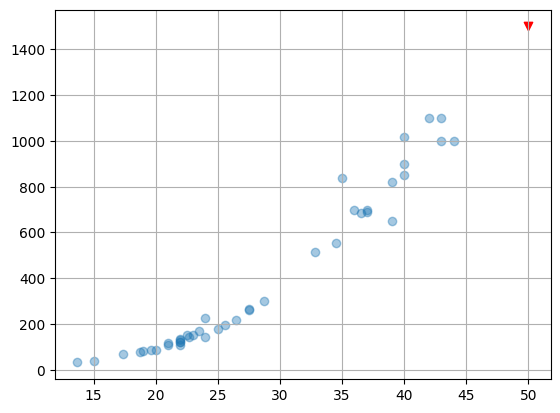

In [258]:
# 훈련 셋 시각화
plt.scatter(X_train, y_train, alpha=0.4)

# 가상의 물고기(50cm, 1500g)
plt.scatter(50, 1500, color='red', marker='v')

plt.grid()
plt.show()

In [259]:
# 길이 50cm인 물고기의 무게 예측값.
prediction = knn.predict([[50]])    # 2d array로 값을 줘야 예측값이 산출됨.

In [260]:
prediction

array([1010.])

In [261]:
indices = knn.kneighbors([[50]], return_distance=False)

In [262]:
indices # 가상의 물고기와 가장 가까운 훈련 셋 샘플의 인덱스 5개

array([[34, 14,  8, 40,  6]])

In [263]:
y_train[indices[0]] # 가장 가까운 5개 샘플의 레이블(무게)

array([1000., 1100., 1000., 1100.,  850.])

In [264]:
(1000 + 1100 + 1000 + 1100 + 850) / 5

1010.0

머신 러닝의 종류 - 단순하게 알고 있는 데이터 포인트와 새 데이터 포인트를 비교하는 것인지, 아니면 훈련 셋에서 특정한 패턴을(공식 발견) 발견하거나 예측 모델을 만드는지
* 사례 기반 머신러닝
    * 수학적인 모델을 만들지 않고, 훈련 셋의 특성들을 이용해서 예측.
    * outlier들이 많은 경우에는 성능이 떨어질 수 있음.
    * 예 : KNN
* 모델 기반 머신러닝
    * 훈련 셋에서 수학적인 모델을 만들고, 그 수학 모델로 예측하는 알고리즘
    * 선형 회귀(Linear Regression)

# Linear Regression

In [265]:
lin_reg = LinearRegression()    # 선형 회귀 모델 생성

In [266]:
lin_reg.fit(X_train, y_train)   # 선형 회귀 모델 훈련 - MSE를 최소화하는 직선의 방정식을 찾는 과정.

LinearRegression()

In [267]:
lin_reg.coef_   # 계수 (a기울기) = 39x, 선형 회귀식 y = ax + b 에서 독립변수 x의 계수(직선의 기울기)

array([39.01714496])

In [268]:
lin_reg.intercept_  # y절편, 선형 회귀식 y = ax + b 에서 y 절편 b

np.float64(-709.0186449535477)

In [269]:
# y = 39x - 709 공식을 얻음

In [270]:
train_pred = lin_reg.predict(X_train)

In [271]:
train_pred

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [272]:
X_train @ lin_reg.coef_ + lin_reg.intercept_    # y = X @ a + b

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [273]:
# 훈련 셋의 MSE
mean_squared_error(y_train, train_pred)     # MSE는 KNN의 MSE보다 큼.

7422.953552609781

In [274]:
np.sqrt(mean_squared_error(y_train, train_pred))

np.float64(86.1565641875869)

In [275]:
# 훈련 셋의 결정계수
r2_score(y_train, train_pred)   # 결정계수는 KNN의 결정계수보다 작음.

0.939846333997604

In [276]:
# 테스트 세트의 예측값
test_pred = lin_reg.predict(X_test)

# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)

17590.265977889187

In [277]:
# 테스트 셋의 결정계수
r2_score(y_test, test_pred)     #> KNN 결정계수보다 작음.

0.8247503123313558

Linear Regression 모델의 결과를 보면, 훈련 셋의 평가 점수(MSE, R2)가 테스트 셋의 평가 점수보다 좋음. -> 과적합(overfitting)

In [278]:
# 훈련 셋 무게~길이 산점도
# 테스트 셋 무게~길이 산점도
# 선형 회귀 직선 선그래프

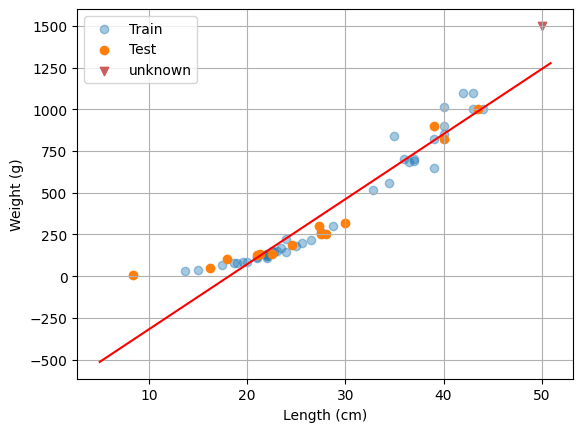

In [279]:
plt.scatter(X_train, y_train, label='Train', alpha=0.4)
plt.scatter(X_test, y_test, label='Test')
plt.scatter(50, 1500, marker='v', color='IndianRed', label='unknown')
# 선형 회귀 직선 선 그래프
x = np.arange(5, 51, 0.1).reshape((-1, 1))
y_hat = x @ lin_reg.coef_ + lin_reg.intercept_      # (n, 1) @ (1,) -> (n,)
plt.plot(x, y_hat, 'r-')

plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# 다항 회귀

2차항을 포함하는 선형 회귀

In [280]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [281]:
X_train_poly = np.c_[X_train ** 2, X_train]

In [282]:
X_train_poly.shape

(42, 2)

In [283]:
X_train_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [284]:
lin_reg = LinearRegression()    # 모델 생성

In [285]:
lin_reg.fit(X_train_poly, y_train)  # 모델 훈련 -> y = ax^2 + bx + c 함수의 계수 a,b 와 절편 c를 찾음.

LinearRegression()

In [286]:
lin_reg.coef_   # (2,) shape의 1차원 배열 <- 특성이 2개(x^2, x)이기 때문에

array([  1.01433211, -21.55792498])

In [287]:
lin_reg.intercept_

np.float64(116.0502107827827)

In [288]:
X_train_poly @ lin_reg.coef_ + lin_reg.intercept_       # 예측값을 찾는 과정. y = ax^2 + bx + c
# (42, 2) @ (2,) -> (42,)
# (42,) + scalar -> (42,)

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [289]:
train_pred = lin_reg.predict(X_train_poly)  # 훈련 셋의 예측값

In [290]:
train_pred

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [291]:
# 훈련 셋의 결정계수
r2_score(y_train, train_pred)

0.9706807451768623

In [292]:
# 2차항을 포함하는 테스트 셋
X_test_poly = np.c_[X_test ** 2, X_test]

In [293]:
X_test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [294]:
test_pred = lin_reg.predict(X_test_poly)    # 테스트 셋의 예측값

In [295]:
test_pred

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [296]:
# 테스트 셋의 결정계수
r2_score(y_test, test_pred)

0.9775935108325122

In [297]:
# 훈련 셋 산점도
# 테스트 셋 산점도
# 선형회귀 2차 함수 선그래프

In [298]:
lin_reg.coef_

array([  1.01433211, -21.55792498])

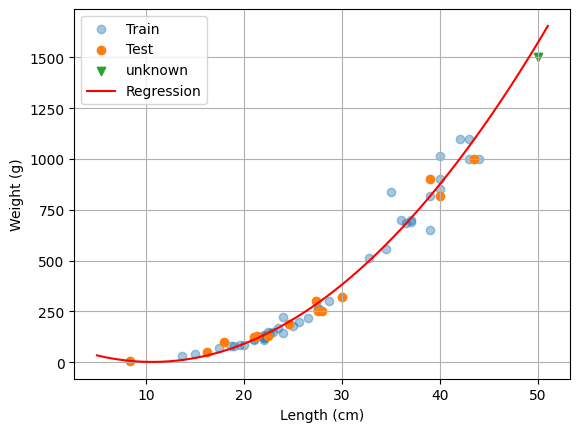

In [299]:
plt.scatter(X_train, y_train, label='Train', alpha=0.4)
plt.scatter(X_test, y_test, label='Test')
plt.scatter(50, 1500, label='unknown', marker='v')
# 선형회귀 2차 함수 선 그래프
x_list = np.arange(5, 51, 0.001).reshape((-1, ))
X_train_poly = np.c_[x_list ** 2, x_list]       # ???
y_hat = X_train_poly @ lin_reg.coef_ + lin_reg.intercept_   # x^2 * a + x * b + c
plt.plot(x_list, y_hat, 'r-', label='Regression')


plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid()
plt.show()

# Pipeline

Pipeline : PolynomialFeatures + LinearRegression

scikit-learn 클래스 설계 철학
* 변환기(Transformer)
    * `fit`, `fit_transform`, `transform` 메서드들을 가지고 있음.
    * 데이터 전처리(preprocessing) 과정에서 주로 사용.
    * 예 : StandardScaler, MinMaxScaler, PolynomialFeatures, ...
* 추정기(Estimator)
    * `fit`, `predict`, `score` 메서드들을 가지고 있음.
    * ML 알고리즘들을 구현한 클래스.
    * KNeighborsClassifier, KNeighborsRegressor, LinearRegression, ...

In [355]:
X_train.shape, X_test.shape

((42, 4), (14, 4))

In [356]:
poly = PolynomialFeatures(degree=3, include_bias=False)   # 변환기 객체 생성, degree : 차수 설정
result = poly.fit_transform(X_train)    # 변환기를 사용해서 훈련 셋을 변환
print(poly.get_feature_names_out())     # 차수의 순서를 알려줌??
print(result.shape)     # x, x^2 형태
print(result[:5, :])

['x0' 'x1' 'x2' 'x3' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x1^2' 'x1 x2' 'x1 x3'
 'x2^2' 'x2 x3' 'x3^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x2^2' 'x0 x2 x3' 'x0 x3^2' 'x1^3' 'x1^2 x2'
 'x1^2 x3' 'x1 x2^2' 'x1 x2 x3' 'x1 x3^2' 'x2^3' 'x2^2 x3' 'x2 x3^2'
 'x3^3']
(42, 34)
[[1.96000000e+01 2.08000000e+01 5.13760000e+00 3.03680000e+00
  3.84160000e+02 4.07680000e+02 1.00696960e+02 5.95212800e+01
  4.32640000e+02 1.06862080e+02 6.31654400e+01 2.63949338e+01
  1.56018637e+01 9.22215424e+00 7.52953600e+03 7.99052800e+03
  1.97366042e+03 1.16661709e+03 8.47974400e+03 2.09449677e+03
  1.23804262e+03 5.17340702e+02 3.05796528e+02 1.80754223e+02
  8.99891200e+03 2.22273126e+03 1.31384115e+03 5.49014622e+02
  3.24518765e+02 1.91820808e+02 1.35606612e+02 8.01561348e+01
  4.73797396e+01 2.80058380e+01]
 [2.20000000e+01 2.35000000e+01 5.87500000e+00 3.52500000e+00
  4.84000000e+02 5.17000000e+02 1.29250000e+02 7.75500000e+01
  5.52250000e+02 1.38062500e+02 8.28375000e+

In [358]:
# Pipeline으로 연결할 변환기 생성
poly = PolynomialFeatures(degree=2, include_bias=False)

# Pipeline으로 연결한 추정기 생성
reg = LinearRegression()

# Pipeline 생성
model = Pipeline(steps = [('poly_features', poly), ('lin_reg', reg)])

In [303]:
model

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [304]:
# 모델 훈련(Pipeline.fit 메서드 호출) : (1) 변환기 fit_transform, (2) 추정기 fit
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [305]:
model['lin_reg'].coef_

array([-21.55792498,   1.01433211])

In [306]:
model['lin_reg'].intercept_

np.float64(116.05021078278395)

In [307]:
model.predict(X_train)   # 훈련 셋 예측값

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [308]:
model.predict(X_test)   # 테스트 셋 예측값

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

# Perch(농어)의 모든 특성(Length, Diagonal, Height, Width)을 사용한 무게 예측

* perch 데이터프레임에서 특성 배열(2차원) X, 타겟 배열(1차원) y을 생성.
* 훈련 셋/ 테스트 셋 분리
* KNN 모델 생성, 훈련, 예측, 평가
* LinearRegression 모델 생성, 훈련, 예측, 평가.
* PolynomialFeatures(degree=2), LinearRegression, Pipeline을 사용한 모델 생성, 예측, 평가

In [309]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


## 특성 배열, 타겟 배열 생성

In [310]:
X = perch[['Length', 'Diagonal', 'Height', 'Width']].values

In [311]:
X.shape

(56, 4)

In [312]:
y = perch['Weight'].values

In [313]:
y.shape

(56,)

## 훈련 셋/ 테스트 셋 분리

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [315]:
X_train.shape, y_train.shape

((42, 4), (42,))

In [316]:
X_test.shape, y_test.shape

((14, 4), (14,))

## KNN 모델 생성, 훈련, 예측, 평가

In [317]:
knn = KNeighborsRegressor()    # KNN 모델 생성

In [318]:
knn.fit(X_train, y_train)   # 모델 훈련

KNeighborsRegressor()

In [319]:
train_pred = knn.predict(X_train)   # 모델 예측

In [320]:
train_pred

array([  87.6,  123. ,   79.6,   70.6,  723. ,  183.4,  847. ,  847. ,
       1020. ,  123. ,   95. ,  123. ,  174. ,  248. , 1043. ,  847. ,
        174. ,  122. ,  248. ,  847. ,  582. ,  224. ,  723. ,   60. ,
        142. ,   60. ,  685. ,  694.2,  248. ,  167. ,  847. ,  122. ,
        139. ,  123. , 1020. ,  136. ,   79.6,  685. ,  123. ,  193. ,
       1043. ,  659. ])

In [321]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [322]:
knn.score(X_train, y_train) # 모델 예측

0.97579760182756

In [323]:
mean_squared_error(y_train, train_pred)     # MSE 평가

2986.5723809523806

In [324]:
np.sqrt(mean_squared_error(y_train, train_pred))    # 54

np.float64(54.64954145235237)

In [325]:
r2_score(y_train, train_pred)       # 0.97

0.97579760182756

In [326]:
test_pred = knn.predict(X_test)
mean_squared_error(y_test, test_pred)       # MSE와 RMSE는 테스트셋이 훈련 셋보다 더 좋음. 과소적합 case

837.3100000000001

In [327]:
r2_score(y_test, test_pred)         # 0.99

0.9916579819676246

KNNRegressor에서 훈련 셋은 MSE: 2986, r^2 값 97 / 테스트 셋은 MSE: 837, r^2 값 99로 훈련 셋보다 테스트 셋의 결과가 더 좋게 나옵니다. 이는 과소적합으로 보여집니다.

## LinearRegression 모델 생성, 훈련, 예측, 평가.

In [328]:
lin_reg = LinearRegression()    # 선형 회귀 모델 생성

In [329]:
lin_reg.fit(X_train, y_train)   # 모델 훈련

LinearRegression()

In [330]:
train_pred = lin_reg.predict(X_train)   # 모델 예측

In [331]:
train_pred

array([  50.07831254,  149.63115115,   26.52323981,  -11.85322276,
        727.07849472,  216.11818851,  859.35210445,  894.24144157,
        883.76216601,  133.80604761,   30.46174313,  165.45625469,
        267.36647321,  302.42993565,  942.06583292,  859.73196835,
        209.15316045,  137.18128947,  294.64533152,  907.16858502,
        585.54863062,  292.8893912 ,  763.11655759, -149.53132283,
        163.94525857, -104.38889956,  718.95576629,  815.95759166,
        350.34538816,  195.07245372,  764.17125484,  130.77848264,
        116.61555757,  142.50754589,  959.21205119,  218.69399647,
         79.52715018,  737.86169572,  161.30274218,  243.72987423,
        939.22223984,  665.0680958 ])

In [332]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [333]:
lin_reg.score(X_train, y_train)     # 모델 예측.

0.9567246116638569

In [334]:
mean_squared_error(y_train, train_pred)     # 훈련 셋 MSE

5340.176566753986

In [335]:
np.sqrt(mean_squared_error(y_train, train_pred))

np.float64(73.07651173088372)

In [336]:
r2_score(y_train, train_pred)   # 0.95

0.9567246116638569

In [337]:
test_pred = lin_reg.predict(X_test)
mean_squared_error(y_test, test_pred)

12140.410523504848

In [338]:
r2_score(y_test, test_pred)     # 0.87

0.8790465615990273

선형회귀분석의 훈련 셋 결과는 MSE: 5340, r^2 값 95 / 테스트 셋 결과는 MSE: 12140, r^2 값 87로 훈련 셋의 결과가 더 좋게 나오므로 이는 과대적합으로 보여집니다.

## PolynomialFeatures(degree=2), LinearRegression, Pipeline 을 사용한 모델 생성, 예측, 평가

In [339]:
poly = PolynomialFeatures(degree=2, include_bias=False) # poly 모델 생성

In [340]:
lin = LinearRegression()    # 추정기 생성

In [341]:
model = Pipeline([('poly_features', poly), ('Linear_Reg', lin)])

In [342]:
model

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('Linear_Reg', LinearRegression())])

In [343]:
model.fit(X_train, y_train)     # 모델 훈련

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('Linear_Reg', LinearRegression())])

In [344]:
model['Linear_Reg'].coef_

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [345]:
model['Linear_Reg'].intercept_

np.float64(67.36628210104692)

In [346]:
train_pred = model.predict(X_train)  # 훈련 셋 예측값

In [347]:
test_pred = model.predict(X_test)   # 테스트 셋 예측값

In [348]:
mean_squared_error(y_train, train_pred) # 훈련 셋 MSE

986.5134830825882

In [349]:
np.sqrt(mean_squared_error(y_train, train_pred))

np.float64(31.40881218834275)

In [350]:
r2_score(y_train, train_pred)       # 0.99

0.9920055538341142

In [351]:
mean_squared_error(y_test, test_pred)   # 테스트 셋 MSE

5092.809112552995

In [352]:
r2_score(y_test, test_pred)     # 0.94

0.949260960155303

pipeline 모델에서 훈련 셋은 MSE : 986, r^2 값은 0.99 / 테스트 셋의 MSE : 5092, r^2 값은 0.94로 훈련 세트의 값이 더 잘나오며 이는 과대적합의 영향이 있음을 보여줍니다.